In [1]:
import pandas as pd

file_path = 'all_clinical.csv'

try:
    df = pd.read_csv(file_path)
    print("File loaded successfully.")
except pd.errors.ParserError as e:
    print(f"Error parsing file: {e}")

File loaded successfully.


In [2]:
df = df.loc[:, (df != '.').any(axis=0)]
print(f"Number of columns after removal: {df.shape[1]}")

Number of columns after removal: 156


In [ ]:
pd.set_option("display.max_columns", None) 
pd.set_option("display.width", None)  


In [4]:
columns_to_remove = ['age_is_obfuscated', 'cause_of_death', 'country_of_residence_at_enrollment', 'days_to_birth',
                     'days_to_death', 'ethnicity', 'race', 'vital_status', 'year_of_birth', 'year_of_death', 
                     'age_at_diagnosis', 'days_to_diagnosis', 'days_to_last_follow_up', 'year_of_diagnosis',
                    'days_to_treatment_end', 'days_to_treatment_start', 'timepoint_category', 'treatment_intent_type',
                'treatment_or_therapy', 'prescribed_dose', 'prescribed_dose_units']  
df = df.drop(columns=columns_to_remove)
print(f"Columns removed. Number of columns after removal: {df.shape[1]}")

Columns removed. Number of columns after removal: 135


In [5]:
df = df[df['project_id'] != 'FM-AD']
print(f"Number of rows after removal: {df.shape[0]}")

Number of rows after removal: 79566


In [6]:
df.drop(columns=['project_id'], inplace=True)

In [ ]:
import pandas as pd
import numpy as np

treatment_stats = df.groupby('treatment_type').agg(
    average_dose=('treatment_dose', lambda x: x.replace('.', np.nan).dropna().astype(float).mean()),
    most_common_agent=('therapeutic_agents', lambda x: x.mode()[0] if not x.mode().empty else np.nan)
).reset_index()

df = df.merge(treatment_stats, on='treatment_type', how='left')

df['treatment_dose'] = df['treatment_dose'].replace('.', np.nan).astype(float)
df['treatment_dose'].fillna(df['average_dose'], inplace=True)

df['therapeutic_agents'] = df['therapeutic_agents'].replace('.', np.nan)
df['therapeutic_agents'].fillna(df['most_common_agent'], inplace=True)

df['treatment_dose_units'] = df.groupby('treatment_type')['treatment_dose_units'].apply(
    lambda x: x.replace('.', np.nan).fillna(method='ffill').fillna(method='bfill')
).reset_index(drop=True)

df.drop(columns=['average_dose', 'most_common_agent'], inplace=True)


/var/folders/y0/nw305xy1131327ks861hhdbr0000gp/T/ipykernel_2556/2873355168.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  average_dose=('treatment_dose', lambda x: x.replace('.', np.nan).dropna().astype(float).mean()),
/var/folders/y0/nw305xy1131327ks861hhdbr0000gp/T/ipykernel_2556/2873355168.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  average_dose=('treatment_dose', lambda x: x.replace('.', np.nan).dropna().astype(float).mean()),
/var/folders/y0/nw305xy1131327ks861hhdbr0000gp/T/ipykernel_2556/2873355168.py:6: FutureW

In [8]:
df['treatment_dose'] = df['treatment_dose'].fillna('.').astype(str).apply(lambda x: int(float(x)) if x != '.' else x)

In [9]:
df.loc[df['treatment_dose'] == '.', 'treatment_dose_units'] = '.'

In [10]:
df.drop(columns=['treatment_outcome'], inplace=True)

In [11]:
df.drop(columns=['ann_arbor_b_symptoms', 'best_overall_response', 'clark_level',
                 'days_to_best_overall_response', 'figo_stage', 'figo_staging_edition_year',
                 'last_known_disease_status', 'method_of_diagnosis', 'clinical_trial_indicator', 
                 'course_number', 'residual_disease.1','icd_10_code', 'tumor_of_origin', 'ann_arbor_clinical_stage', 
                 'ann_arbor_extranodal_involvement', 'cog_rhabdomyosarcoma_risk_group', 
                 'irs_group', 'melanoma_known_primary', 'synchronous_malignancy', 'ulceration_indicator',
                 'progression_or_recurrence'], inplace=True)


In [12]:
df = df[(df['treatment_type'] != '.') & (df['ajcc_pathologic_m'] != '.')]
print(f"Number of rows after removal: {df.shape[0]}")

Number of rows after removal: 24147


In [13]:
df.replace(', NOS', '', regex=True, inplace=True)


In [14]:
df.drop(columns=['ajcc_clinical_m', 'ajcc_clinical_n', 'ajcc_clinical_stage', 'ajcc_clinical_t'], inplace=True)

In [15]:
df.replace('.', np.nan, inplace=True)

/var/folders/y0/nw305xy1131327ks861hhdbr0000gp/T/ipykernel_2556/4058857446.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('.', np.nan, inplace=True)


In [16]:
df.head()

,case_id,case_submitter_id,age_at_index,cause_of_death_source,country_of_birth,gender,population_group,ajcc_pathologic_m,ajcc_pathologic_n,ajcc_pathologic_stage,ajcc_pathologic_t,ajcc_serum_tumor_markers,ajcc_staging_system_edition,ann_arbor_pathologic_stage,burkitt_lymphoma_clinical_variant,calgb_risk_group,cancer_detection_method,child_pugh_classification,classification_of_tumor,cog_neuroblastoma_risk_group,cog_renal_stage,diagnosis_is_primary_disease,double_expressor_lymphoma,double_hit_lymphoma,enneking_msts_grade,enneking_msts_metastasis,enneking_msts_tumor_site,ensat_clinical_m,ensat_pathologic_n,ensat_pathologic_stage,ensat_pathologic_t,esophageal_columnar_dysplasia_degree,esophageal_columnar_metaplasia_present,fab_morphology_code,first_symptom_longest_duration,first_symptom_prior_to_diagnosis,gastric_esophageal_junction_involvement,gleason_grade_tertiary,gleason_score,goblet_cells_columnar_mucosa_present,igcccg_stage,inpc_grade,inss_stage,international_prognostic_index,ishak_fibrosis_score,laterality,margin_distance,margins_involved_site,masaoka_stage,max_tumor_bulk_site,metastasis_at_diagnosis,mitosis_karyorrhexis_index,morphology,ovarian_specimen_status,ovarian_surface_involvement,pediatric_kidney_staging,peritoneal_fluid_cytological_status,pregnant_at_diagnosis,primary_diagnosis,primary_gleason_grade,prior_malignancy,prior_treatment,residual_disease,satellite_nodule_present,secondary_gleason_grade,site_of_resection_or_biopsy,supratentorial_localization,tissue_or_organ_of_origin,tumor_confined_to_organ_of_origin,tumor_depth,tumor_focality,tumor_grade,tumor_grade_category,tumor_regression_grade,uicc_clinical_stage,uicc_pathologic_m,uicc_pathologic_n,uicc_pathologic_stage,uicc_pathologic_t,uicc_staging_system_edition,weiss_assessment_score,who_cns_grade,wilms_tumor_histologic_subtype,chemo_concurrent_to_radiation,drug_category,initial_disease_status,margin_distance.1,margin_status,margins_involved_site.1,number_of_cycles,number_of_fractions,pretreatment,protocol_identifier,radiosensitizing_agent,reason_treatment_ended,reason_treatment_not_given,regimen_or_line_of_therapy,therapeutic_agents,therapeutic_levels_achieved,therapeutic_target_level,treatment_anatomic_site,treatment_dose,treatment_dose_max,treatment_dose_units,treatment_duration,treatment_frequency,treatment_outcome_duration,treatment_type
0,0004d251-3f70-4395-b175-c94c2f5b1b81,TCGA-DD-AAVP,48,NaN,NaN,male,NaN,M0,N0,Stage I,T1,NaN,6th,NaN,NaN,NaN,NaN,A,primary,NaN,NaN,TRUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 - Established Cirrhosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8170/3,NaN,NaN,NaN,NaN,NaN,Hepatocellular carcinoma,NaN,no,No,R0,NaN,NaN,Liver,NaN,Liver,NaN,NaN,NaN,G1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,794.0,NaN,NaN,NaN,NaN,NaN,Radiation Therapy
1,0004d251-3f70-4395-b175-c94c2f5b1b81,TCGA-DD-AAVP,48,NaN,NaN,male,NaN,M0,N0,Stage I,T1,NaN,6th,NaN,NaN,NaN,NaN,A,primary,NaN,NaN,TRUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 - Established Cirrhosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8170/3,NaN,NaN,NaN,NaN,NaN,Hepatocellular carcinoma,NaN,no,No,R0,NaN,NaN,Liver,NaN,Liver,NaN,NaN,NaN,G1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8367.0,NaN,NaN,NaN,NaN,NaN,Pharmaceutical Therapy
2,0004d251-3f70-4395-b175-c94c2f5b1b81,TCGA-DD-AAVP,48,NaN,NaN,male,NaN,M0,N0,Stage I,T1,NaN,6th,NaN,NaN,NaN,NaN,A,primary,NaN,NaN,TRUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 - Established Cirrhosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8170/3,NaN,NaN,NaN,NaN,NaN,Hepatocellular carcinoma,NaN,no,No,R0,NaN,NaN,Liver,NaN,Liver,NaN,NaN,NaN,G1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ablation or Embolization
3,0004d251-3f70

In [17]:
df.to_csv('all_dosages.csv')

In [19]:
merged_df = df

In [20]:
merged_df.drop(columns=['tumor_grade', 'initial_disease_status', 'margin_status', 'number_of_cycles',
                 	'number_of_fractions', 'regimen_or_line_of_therapy'], inplace=True)

In [21]:
merged_df.drop(columns=['tumor_confined_to_organ_of_origin', 'residual_disease', 'max_tumor_bulk_site'], inplace=True)

In [22]:
merged_df['age_at_index'].fillna(60.0, inplace=True)

/var/folders/y0/nw305xy1131327ks861hhdbr0000gp/T/ipykernel_2556/3641452522.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['age_at_index'].fillna(60.0, inplace=True)


In [23]:
num_rows_merged_df = merged_df.shape[0]
print(f"Number of rows in merged_df: {num_rows_merged_df}")

Number of rows in merged_df: 24147


In [24]:
merged_df.to_csv('all_dosages.csv')

In [ ]:

mode_ajcc_pathologic_n = merged_df['ajcc_pathologic_n'].mode()[0]

merged_df['ajcc_pathologic_n'].fillna(mode_ajcc_pathologic_n, inplace=True)

print(f"Mode of ajcc_pathologic_n: {mode_ajcc_pathologic_n}")
print("Missing values filled.")

Mode of ajcc_pathologic_n: N0
Missing values filled.


/var/folders/y0/nw305xy1131327ks861hhdbr0000gp/T/ipykernel_2556/1199768838.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['ajcc_pathologic_n'].fillna(mode_ajcc_pathologic_n, inplace=True)


In [ ]:

mode_ajcc_pathologic_n = merged_df['ajcc_pathologic_stage'].mode()[0]

merged_df['ajcc_pathologic_stage'].fillna(mode_ajcc_pathologic_n, inplace=True)

print(f"Mode of ajcc_pathologic_stage: {mode_ajcc_pathologic_n}")
print("Missing values filled.")

Mode of ajcc_pathologic_stage: Stage I
Missing values filled.


/var/folders/y0/nw305xy1131327ks861hhdbr0000gp/T/ipykernel_2556/2512565905.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['ajcc_pathologic_stage'].fillna(mode_ajcc_pathologic_n, inplace=True)


In [ ]:

mode_ajcc_pathologic_n = merged_df['ajcc_pathologic_t'].mode()[0]

merged_df['ajcc_pathologic_t'].fillna(mode_ajcc_pathologic_n, inplace=True)

print(f"Mode of ajcc_pathologic_t: {mode_ajcc_pathologic_n}")
print("Missing values filled.")

Mode of ajcc_pathologic_t: T2
Missing values filled.


/var/folders/y0/nw305xy1131327ks861hhdbr0000gp/T/ipykernel_2556/2544197932.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['ajcc_pathologic_t'].fillna(mode_ajcc_pathologic_n, inplace=True)


In [ ]:

mode_ajcc_pathologic_n = merged_df['diagnosis_is_primary_disease'].mode()[0]

merged_df['diagnosis_is_primary_disease'].fillna(mode_ajcc_pathologic_n, inplace=True)

print(f"Mode of ajcc_pathologic_n: {mode_ajcc_pathologic_n}")
print("Missing values filled.")

Mode of ajcc_pathologic_n: TRUE
Missing values filled.


/var/folders/y0/nw305xy1131327ks861hhdbr0000gp/T/ipykernel_2556/31138076.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['diagnosis_is_primary_disease'].fillna(mode_ajcc_pathologic_n, inplace=True)


In [ ]:

mode_ajcc_pathologic_n = merged_df['prior_malignancy'].mode()[0]

merged_df['prior_malignancy'].fillna(mode_ajcc_pathologic_n, inplace=True)

print(f"Mode of ajcc_pathologic_n: {mode_ajcc_pathologic_n}")
print("Missing values filled.")

mode_ajcc_pathologic_n = merged_df['prior_treatment'].mode()[0]

merged_df['prior_treatment'].fillna(mode_ajcc_pathologic_n, inplace=True)

print(f"Mode of ajcc_pathologic_n: {mode_ajcc_pathologic_n}")
print("Missing values filled.")

Mode of ajcc_pathologic_n: no
Missing values filled.
Mode of ajcc_pathologic_n: No
Missing values filled.


/var/folders/y0/nw305xy1131327ks861hhdbr0000gp/T/ipykernel_2556/3391565450.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['prior_malignancy'].fillna(mode_ajcc_pathologic_n, inplace=True)
/var/folders/y0/nw305xy1131327ks861hhdbr0000gp/T/ipykernel_2556/3391565450.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

In [ ]:

mode_ajcc_pathologic_n = merged_df['laterality'].mode()[0]

merged_df['laterality'].fillna(mode_ajcc_pathologic_n, inplace=True)

print(f"Mode of ajcc_pathologic_n: {mode_ajcc_pathologic_n}")
print("Missing values filled.")

Mode of ajcc_pathologic_n: Right
Missing values filled.


/var/folders/y0/nw305xy1131327ks861hhdbr0000gp/T/ipykernel_2556/335512372.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['laterality'].fillna(mode_ajcc_pathologic_n, inplace=True)


In [31]:
merged_df.drop(columns=['ajcc_staging_system_edition'], inplace=True)

In [32]:
unique_ajcc_pathologic_stage = merged_df['ajcc_pathologic_stage'].unique()
print(unique_ajcc_pathologic_stage)

['Stage I' 'Stage II' 'Stage IV' 'Stage IA' 'Stage IIIB' 'Stage III'
 'Stage IIA' 'Stage IIB' 'Stage IB' 'Stage 0' 'Stage IIIA' 'Stage IIIC'
 'Stage IVA' 'Stage 0is' 'Stage IS' 'Stage IVB' 'Stage X' 'Stage IA2'
 'Stage IIIA2' 'Stage IIC' 'Stage 0a' 'Stage IIIC1' 'Unknown'
 'Not Reported' 'Stage IVC' 'Stage IC' 'Stage IB1']


In [33]:
merged_df['metastasis_at_diagnosis'] = merged_df['ajcc_pathologic_stage'].apply(
    lambda x: 'metastasis' if x == 'Stage IV' else 'no metastasis'
)

In [ ]:

columns_to_drop = [
    "cause_of_death_source", "country_of_birth", "population_group",
    "ajcc_serum_tumor_markers", "ann_arbor_pathologic_stage",
    "burkitt_lymphoma_clinical_variant", "calgb_risk_group",
    "cancer_detection_method", "child_pugh_classification",
    "cog_neuroblastoma_risk_group", "cog_renal_stage",
    "double_expressor_lymphoma", "double_hit_lymphoma",
    "enneking_msts_grade", "enneking_msts_metastasis", "enneking_msts_tumor_site",
    "ensat_clinical_m", "ensat_pathologic_n", "ensat_pathologic_stage",
    "ensat_pathologic_t", "esophageal_columnar_dysplasia_degree",
    "esophageal_columnar_metaplasia_present", "fab_morphology_code",
    "first_symptom_longest_duration", "first_symptom_prior_to_diagnosis",
    "gastric_esophageal_junction_involvement", "gleason_grade_tertiary",
    "gleason_score", "goblet_cells_columnar_mucosa_present",
    "igcccg_stage", "inpc_grade", "inss_stage",
    "international_prognostic_index", "ishak_fibrosis_score",
    "margin_distance", "margins_involved_site", "masaoka_stage",
    "mitosis_karyorrhexis_index", "ovarian_specimen_status",
    "ovarian_surface_involvement", "pediatric_kidney_staging",
    "peritoneal_fluid_cytological_status", "pregnant_at_diagnosis",
    "primary_gleason_grade", "satellite_nodule_present",
    "secondary_gleason_grade", "site_of_resection_or_biopsy",
    "supratentorial_localization", "tumor_depth", "tumor_focality",
    "tumor_grade_category", "tumor_regression_grade", "uicc_clinical_stage",
    "uicc_pathologic_m", "uicc_pathologic_n", "uicc_pathologic_stage",
    "uicc_pathologic_t", "uicc_staging_system_edition",
    "weiss_assessment_score", "who_cns_grade",
    "wilms_tumor_histologic_subtype", "chemo_concurrent_to_radiation",
    "drug_category", "margin_distance.1", "margins_involved_site.1",
    "pretreatment", "protocol_identifier", "radiosensitizing_agent",
    "reason_treatment_ended", "reason_treatment_not_given",
    "therapeutic_levels_achieved", "therapeutic_target_level",
    "treatment_anatomic_site", "treatment_dose_max", "treatment_duration",
    "treatment_frequency", "treatment_outcome_duration"
]
merged_df.drop(columns=columns_to_drop, inplace=True)

merged_df.head()


,case_id,case_submitter_id,age_at_index,gender,ajcc_pathologic_m,ajcc_pathologic_n,ajcc_pathologic_stage,ajcc_pathologic_t,classification_of_tumor,diagnosis_is_primary_disease,laterality,metastasis_at_diagnosis,morphology,primary_diagnosis,prior_malignancy,prior_treatment,tissue_or_organ_of_origin,therapeutic_agents,treatment_dose,treatment_dose_units,treatment_type
0,0004d251-3f70-4395-b175-c94c2f5b1b81,TCGA-DD-AAVP,48,male,M0,N0,Stage I,T1,primary,TRUE,Right,no metastasis,8170/3,Hepatocellular carcinoma,no,No,Liver,NaN,794.0,NaN,Radiation Therapy
1,0004d251-3f70-4395-b175-c94c2f5b1b81,TCGA-DD-AAVP,48,male,M0,N0,Stage I,T1,primary,TRUE,Right,no metastasis,8170/3,Hepatocellular carcinoma,no,No,Liver,NaN,8367.0,NaN,Pharmaceutical Therapy
2,0004d251-3f70-4395-b175-c94c2f5b1b81,TCGA-DD-AAVP,48,male,M0,N0,Stage I,T1,primary,TRUE,Right,no metastasis,8170/3,Hepatocellular carcinoma,no,No,Liver,NaN,NaN,NaN,Ablation or Embolization
3,0004d251-3f70-4395-b175-c94c2f5b1b81,TCGA-DD-AAVP,48,male,M0,N0,Stage I,T1,primary,TRUE,Right,no metastasis,8170/3,Hepatocellular carcinoma,no,No,Liver,NaN,NaN,NaN,Surgery
23,0011a67b-1ba9-4a32-a6b8-7850759a38cf,TCGA-DC-6158,70,male,M0,N0,Stage I,T2,primary,TRUE,Right,no metastasis,8140/3,Adenocarcinoma,no,No,Rectum,NaN,794.0,NaN,Radiation Therapy


In [35]:
merged_df.to_csv('all_dosages.csv')

In [36]:
merged_df.head()

,case_id,case_submitter_id,age_at_index,gender,ajcc_pathologic_m,ajcc_pathologic_n,ajcc_pathologic_stage,ajcc_pathologic_t,classification_of_tumor,diagnosis_is_primary_disease,laterality,metastasis_at_diagnosis,morphology,primary_diagnosis,prior_malignancy,prior_treatment,tissue_or_organ_of_origin,therapeutic_agents,treatment_dose,treatment_dose_units,treatment_type
0,0004d251-3f70-4395-b175-c94c2f5b1b81,TCGA-DD-AAVP,48,male,M0,N0,Stage I,T1,primary,TRUE,Right,no metastasis,8170/3,Hepatocellular carcinoma,no,No,Liver,NaN,794.0,NaN,Radiation Therapy
1,0004d251-3f70-4395-b175-c94c2f5b1b81,TCGA-DD-AAVP,48,male,M0,N0,Stage I,T1,primary,TRUE,Right,no metastasis,8170/3,Hepatocellular carcinoma,no,No,Liver,NaN,8367.0,NaN,Pharmaceutical Therapy
2,0004d251-3f70-4395-b175-c94c2f5b1b81,TCGA-DD-AAVP,48,male,M0,N0,Stage I,T1,primary,TRUE,Right,no metastasis,8170/3,Hepatocellular carcinoma,no,No,Liver,NaN,NaN,NaN,Ablation or Embolization
3,0004d251-3f70-4395-b175-c94c2f5b1b81,TCGA-DD-AAVP,48,male,M0,N0,Stage I,T1,primary,TRUE,Right,no metastasis,8170/3,Hepatocellular carcinoma,no,No,Liver,NaN,NaN,NaN,Surgery
23,0011a67b-1ba9-4a32-a6b8-7850759a38cf,TCGA-DC-6158,70,male,M0,N0,Stage I,T2,primary,TRUE,Right,no metastasis,8140/3,Adenocarcinoma,no,No,Rectum,NaN,794.0,NaN,Radiation Therapy


In [37]:
merged_df.drop(columns=['treatment_dose_units'], inplace=True)

In [ ]:
import pandas as pd

merged_df.drop(columns=['case_id', 'case_submitter_id'], inplace=True)
merged_df = merged_df.fillna(0)

x = merged_df[['therapeutic_agents', 'treatment_type']]
y = merged_df['treatment_dose']

print(f"Features shape: {x.shape}")
print(f"Label shape: {y.shape}")

Features shape: (24147, 2)
Label shape: (24147,)


In [40]:
merged_df[['ajcc_pathologic_stage', 'therapeutic_agents','treatment_type', 'treatment_dose']].to_csv('dosages.csv')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3904
[LightGBM] [Info] Number of data points in the train set: 12861, number of used features: 17
[LightGBM] [Info] Start training from score 3675.898530
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3903
[LightGBM] [Info] Number of data points in the train set: 12861, number of used features: 17
[LightGBM] [Info] Start training from score 3657.058005
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001910 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total

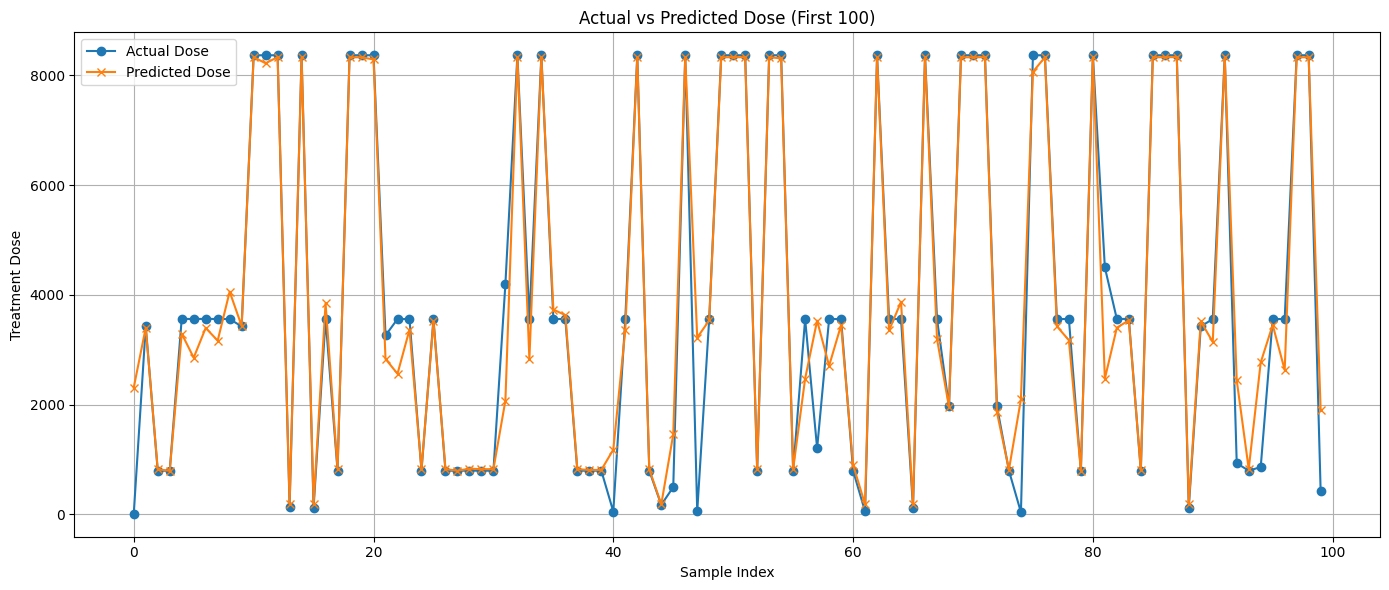

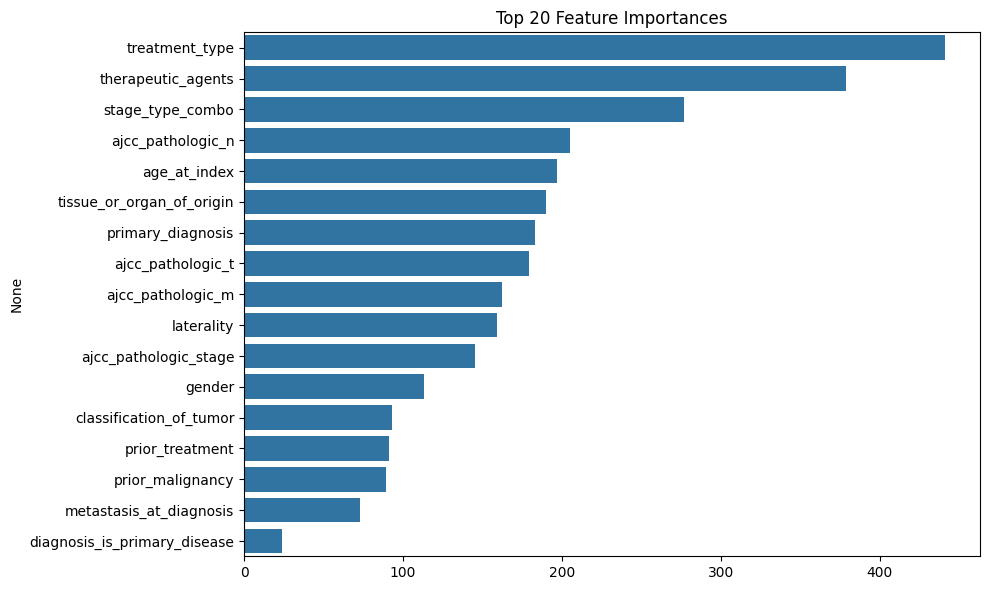

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor
from category_encoders import CatBoostEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('all_dosages.csv')

drop_cols = ['Unnamed: 0', 'case_id', 'case_submitter_id', 'treatment_dose_units', 'morphology']
data.drop(columns=[col for col in drop_cols if col in data.columns], inplace=True)

data['therapeutic_agents'] = data['therapeutic_agents'].fillna('0')
data['age_at_index'] = data['age_at_index'].fillna(data['age_at_index'].median())

Q1 = data['treatment_dose'].quantile(0.25)
Q3 = data['treatment_dose'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
data = data[data['treatment_dose'] <= upper_limit].copy()

cat_cols = [
    'ajcc_pathologic_stage', 'treatment_type', 'gender',
    'ajcc_pathologic_m', 'ajcc_pathologic_n', 'ajcc_pathologic_t',
    'classification_of_tumor', 'diagnosis_is_primary_disease',
    'laterality', 'metastasis_at_diagnosis', 'primary_diagnosis',
    'prior_malignancy', 'prior_treatment', 'tissue_or_organ_of_origin',
    'therapeutic_agents'
]
num_cols = ['age_at_index']

data['stage_type_combo'] = data['ajcc_pathologic_stage'].astype(str) + '_' + data['treatment_type'].astype(str)
cat_cols.append('stage_type_combo')

data.dropna(subset=cat_cols + num_cols, inplace=True)

encoder = CatBoostEncoder()
X_cat = encoder.fit_transform(data[cat_cols], data['treatment_dose']).reset_index(drop=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num = pd.DataFrame(scaler.fit_transform(data[num_cols]), columns=num_cols).reset_index(drop=True)

X = pd.concat([X_cat, X_num], axis=1)
y = data['treatment_dose'].reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lgb_model = LGBMRegressor(random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}
search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_absolute_error',
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)
search.fit(X_train, y_train)
best_model = search.best_estimator_

y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Best Hyperparameters:", search.best_params_)
print("MAE:", mae)
print("MSE:", mse)

actual_100 = y_test[:100].reset_index(drop=True)
predicted_100 = pd.Series(y_pred[:100]).reset_index(drop=True)

plt.figure(figsize=(14, 6))
plt.plot(actual_100, label='Actual Dose', marker='o')
plt.plot(predicted_100, label='Predicted Dose', marker='x')
plt.title('Actual vs Predicted Dose (First 100)')
plt.xlabel('Sample Index')
plt.ylabel('Treatment Dose')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()


Correlation Coefficient: 0.9369243205879745
P-value: 0.0


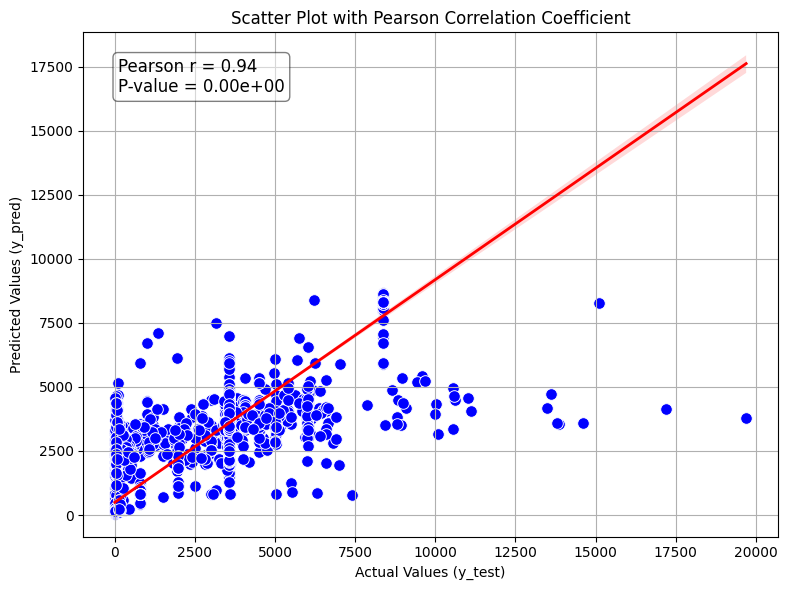

In [ ]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

correlation_coefficient, p_value = pearsonr(y_test, y_pred)

print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', edgecolor='w', s=70)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', line_kws={'linewidth': 2})

plt.text(0.05, 0.95,
         f"Pearson r = {correlation_coefficient:.2f}\nP-value = {p_value:.2e}",
         transform=plt.gca().transAxes,
         fontsize=12,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter Plot with Pearson Correlation Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()
